# Averaging algorithm

In [1]:
import sys; sys.path.append("../")
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from utils import create_network_of_agents, has_reached_consensus

NUM_AGENTS = 6
NUM_ITERS = 30
SEED = 42
rng = np.random.default_rng(SEED)

In [2]:
def plot_history(history_x, figsize=(15, 4)):
    plt.figure(figsize=figsize)
    num_iter = history_x.shape[0]
    num_agents = history_x.shape[1]

    for i in range(num_agents):
        plt.plot(history_x[:, i], label=f"Agent {i}")
    plt.plot([np.mean(history_x[0])]*(num_iter), "--", label="Real average")

    plt.xticks(range(num_iter))
    plt.legend()
    plt.show()

In [3]:
def averaging_algorithm(x0, A, num_iter):
    history_x = np.zeros((num_iter+1, NUM_AGENTS))
    history_x[0] = x0

    for k in range(num_iter):
        history_x[k+1] = A @ history_x[k]

    return history_x

In [4]:
x0 = rng.random((NUM_AGENTS,))
print(f"Initial value of each agent: {x0}")

Initial value of each agent: [0.77395605 0.43887844 0.85859792 0.69736803 0.09417735 0.97562235]


## Row-stochastic adjacency matrix

Eigenvalues of A: [ 1.0000000e+00  5.0000000e-01 -5.4233700e-17 -1.0000000e-01
  6.5311289e-01 -1.5311289e-01]


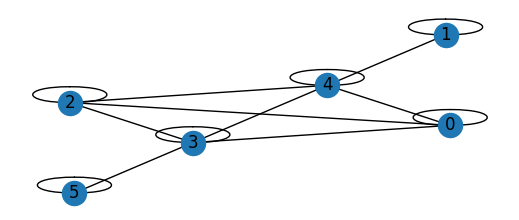

In [5]:
G_row_stoch, A_row_stoch = create_network_of_agents(
    num_agents = NUM_AGENTS, 
    adjacency_form = "row-stochastic", 
    connected = True, 
    graph_algorithm = "erdos_renyi", 
    erdos_renyi_p = 0.3, 
    seed = SEED
)

print(f"Eigenvalues of A: {np.linalg.eig(A_row_stoch).eigenvalues}")

plt.figure(figsize=(5, 2))
nx.draw_kamada_kawai(G_row_stoch, with_labels=True)
plt.show()

In [6]:
history_x_row_stoch = averaging_algorithm(x0.copy(), A_row_stoch, NUM_ITERS)

print(f"Initial state: {history_x_row_stoch[0]}")
print(f"Final state:   {history_x_row_stoch[-1]} | Consensus: {has_reached_consensus(history_x_row_stoch[-1], tolerance=1e-2)}")
print(f"Real average:  {np.mean(x0)}")

Initial state: [0.77395605 0.43887844 0.85859792 0.69736803 0.09417735 0.97562235]
Final state:   [0.60531577 0.60531463 0.60531577 0.60531613 0.60531543 0.60531691] | Consensus: True
Real average:  0.6397666894671946


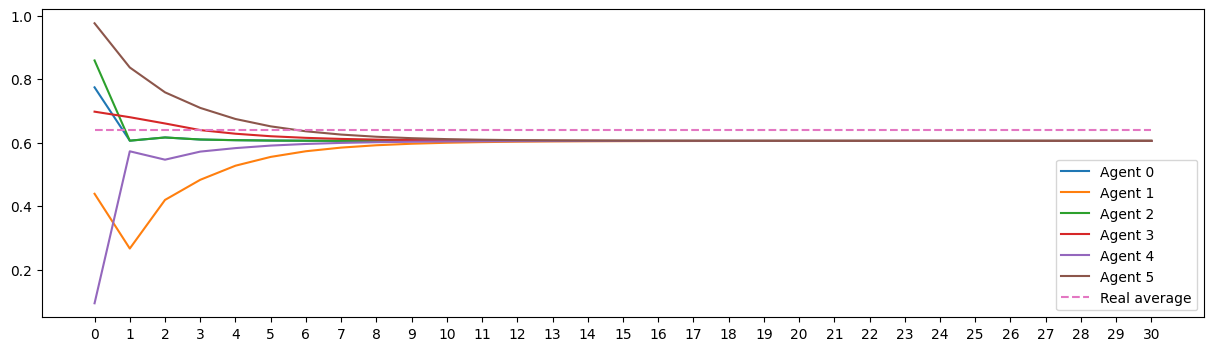

In [7]:
plot_history(history_x_row_stoch)

## Column-stochastic adjacency matrix

In [8]:
_, A_col_stoch = create_network_of_agents(
    num_agents = NUM_AGENTS, 
    adjacency_form = "column-stochastic", 
    connected = True, 
    seed = SEED
)

Initial state: [0.77395605 0.43887844 0.85859792 0.69736803 0.09417735 0.97562235]
Final state:   [0.69792744 0.3489629  0.69792744 0.87240993 0.87240867 0.34896454] | Consensus: False
Real average:  0.6397666894671946


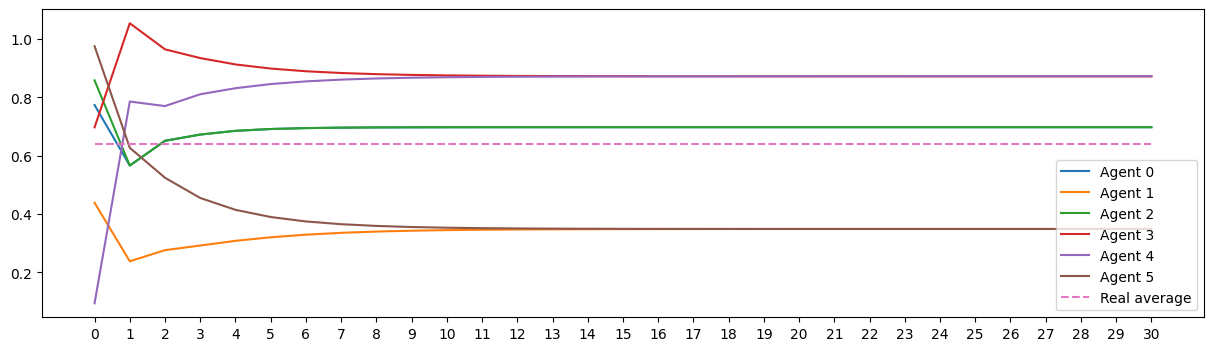

In [9]:
history_x_colum_stoch = averaging_algorithm(x0.copy(), A_col_stoch, NUM_ITERS)

print(f"Initial state: {history_x_colum_stoch[0]}")
print(f"Final state:   {history_x_colum_stoch[-1]} | Consensus: {has_reached_consensus(history_x_colum_stoch[-1], tolerance=1e-2)}")
print(f"Real average:  {np.mean(x0)}")

plot_history(history_x_colum_stoch)

## Doubly-stochastic adjacency matrix

In [10]:
_, A_doubly_stoch = create_network_of_agents(
    num_agents = NUM_AGENTS, 
    adjacency_form = "doubly-stochastic", 
    connected = True, 
    graph_algorithm = "erdos_renyi", 
    erdos_renyi_p = 0.3, 
    seed = SEED
)

Initial state: [0.77395605 0.43887844 0.85859792 0.69736803 0.09417735 0.97562235]
Final state:   [0.63976711 0.63919579 0.63976711 0.63998664 0.63954723 0.64033784] | Consensus: True
Real average:  0.6397666894671946


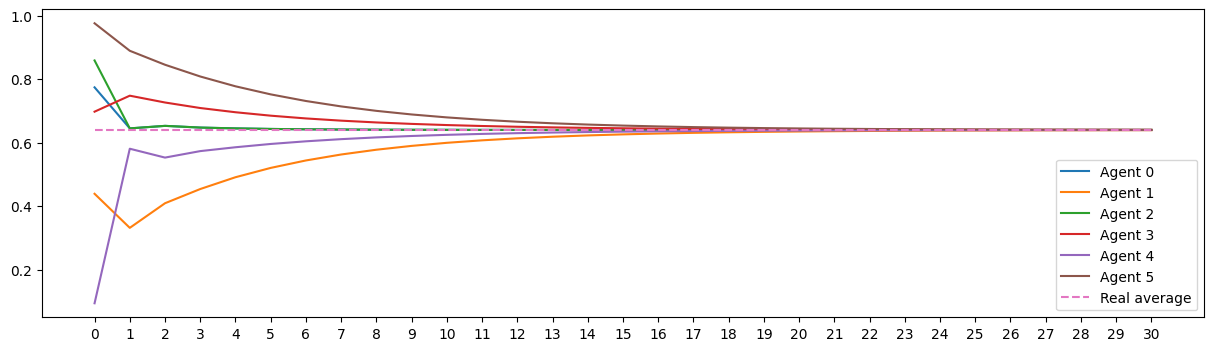

In [11]:
history_x_doubly_stoch = averaging_algorithm(x0.copy(), A_doubly_stoch, NUM_ITERS)

print(f"Initial state: {history_x_doubly_stoch[0]}")
print(f"Final state:   {history_x_doubly_stoch[-1]} | Consensus: {has_reached_consensus(history_x_doubly_stoch[-1], tolerance=1e-2)}")
print(f"Real average:  {np.mean(x0)}")

plot_history(history_x_doubly_stoch)

## Rogue agent

In [12]:
def averaging_algorithm_with_rogue_agent(x0, A, num_iter):
    history_x = np.zeros((num_iter+1, NUM_AGENTS))
    history_x[0] = x0

    for k in range(num_iter):
        history_x[k+1] = A @ history_x[k]
        
        history_x[k+1, 0] = history_x[k, 0] # One agent is constant

    return history_x

In [13]:
_, A_doubly_stoch = create_network_of_agents(
    num_agents = NUM_AGENTS, 
    adjacency_form = "doubly-stochastic", 
    connected = True, 
    seed = SEED
)

Initial state: [0.77395605 0.43887844 0.85859792 0.69736803 0.09417735 0.97562235]
Final state:   [0.77395605 0.76680559 0.77100246 0.76984991 0.7694105  0.7679476 ] | Consensus: True
Real average:  0.6397666894671946


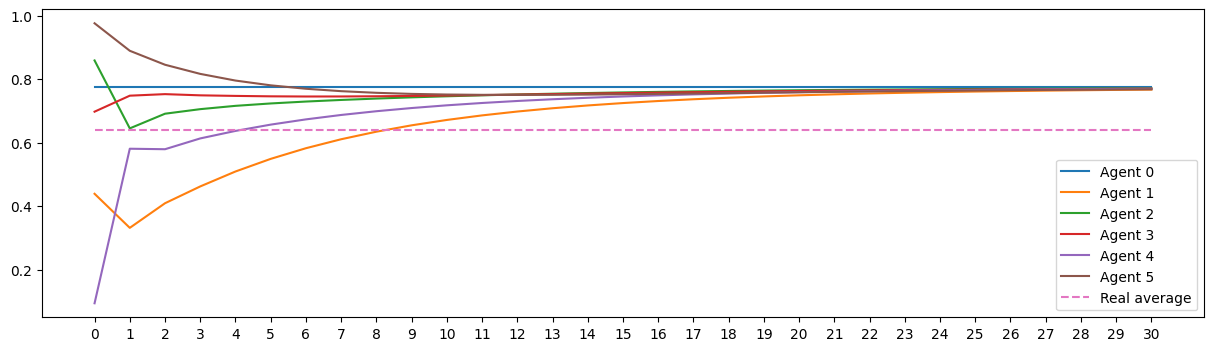

In [14]:
history_x_rogue = averaging_algorithm_with_rogue_agent(x0.copy(), A_doubly_stoch, NUM_ITERS)

print(f"Initial state: {history_x_rogue[0]}")
print(f"Final state:   {history_x_rogue[-1]} | Consensus: {has_reached_consensus(history_x_rogue[-1], tolerance=1e-2)}")
print(f"Real average:  {np.mean(x0)}")

plot_history(history_x_rogue)

## Unconnected graph

### Static adjacency matrix

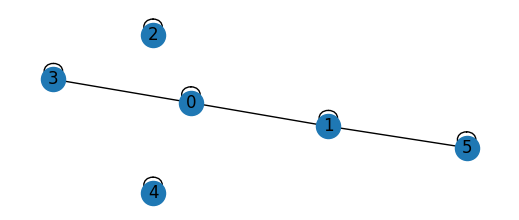

In [15]:
G_unconnected, A_unconnected = create_network_of_agents(
    num_agents = NUM_AGENTS, 
    adjacency_form = "doubly-stochastic", 
    connected = False, 
    seed = SEED
)

plt.figure(figsize=(5, 2))
nx.draw_kamada_kawai(G_unconnected, with_labels=True)
plt.show()

Initial state: [0.77395605 0.43887844 0.85859792 0.69736803 0.09417735 0.97562235]
Final state:   [0.72142889 0.72148225 0.85859792 0.72140403 0.09417735 0.72150712] | Consensus: False
Real average:  0.6397666894671946


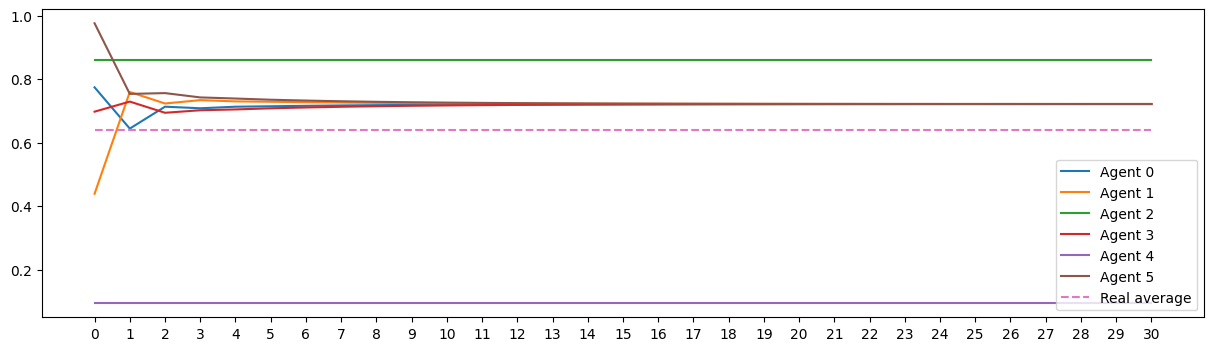

In [16]:
history_x_unconnected = averaging_algorithm(x0.copy(), A_unconnected, NUM_ITERS)

print(f"Initial state: {history_x_unconnected[0]}")
print(f"Final state:   {history_x_unconnected[-1]} | Consensus: {has_reached_consensus(history_x_unconnected[-1], tolerance=1e-2)}")
print(f"Real average:  {np.mean(x0)}")

plot_history(history_x_unconnected)

### Dynamic adjacency matrix

In [17]:
def averaging_algorithm_dynamic_unconnected(x0, num_iter):
    history_x = np.zeros((num_iter+1, NUM_AGENTS))
    history_x[0] = x0
    rng = np.random.default_rng(SEED)

    for k in range(num_iter):
        _, A = create_network_of_agents(
            num_agents = NUM_AGENTS, 
            adjacency_form = "doubly-stochastic", 
            connected = False,
            seed = int(rng.integers(0, 2**32))
        )
        history_x[k+1] = A @ history_x[k]

    return history_x

Initial state: [0.77395605 0.43887844 0.85859792 0.69736803 0.09417735 0.97562235]
Final state:   [0.63976694 0.63976698 0.63976681 0.63976687 0.63976705 0.63976687] | Consensus: True
Real average:  0.6397666894671946


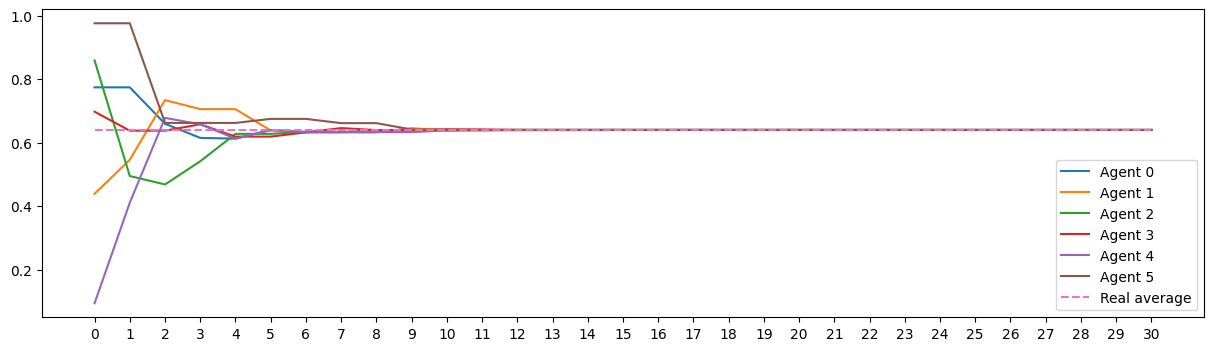

In [18]:
history_x_unconnected = averaging_algorithm_dynamic_unconnected(x0.copy(), NUM_ITERS)

print(f"Initial state: {history_x_unconnected[0]}")
print(f"Final state:   {history_x_unconnected[-1]} | Consensus: {has_reached_consensus(history_x_unconnected[-1], tolerance=1e-2)}")
print(f"Real average:  {np.mean(x0)}")

plot_history(history_x_unconnected)